In [1]:
pip install scipy==1.6.2

     -------------------------------------- 32.7/32.7 MB 756.3 kB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 3.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.0
    Uninstalling scipy-1.10.0:
      Successfully uninstalled scipy-1.10.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.28.1 requires tokenizers!=0.11.3,<0.14,>=0.11.1, but you have tokenizers 0.10.0rc1 which is incompatible.
torchvision 0.9.1 requires torch==1.8.1, but you have torch 1.9.0 which is incompatible.
optuna 3.0.4 requires scipy<1.9.0,>=1.7.0, but you have scipy 1.6.2 which is incompatible.
lightautoml 0.3.7.3 requires pandas<=1.4.3; python_version >= "3.8", but you have pandas 1.5.3 which is incompatible.
lightautoml 0.3.7.3 requires torch<1.9, but you have torch 1.9.0 which is incompatible.
gensim 4.3.1 requires scipy>=1.7.0, but you have scipy 1.6.2 which is incompatible.
cvxpy 1.3.0 requires setuptools<=64.0.2, but you have setuptools 67.4.0 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from scipy import sparse
import numpy as np
from scipy.sparse import lil_matrix, dok_matrix
# CSR-матрица
sample_csr = sparse.csr_matrix([[1, 2, 0], [0, 0, 3], [4, 0, 5]])
row = np.array([0, 2, 2, 0, 1, 2])
col = np.array([0, 0, 1, 2, 2, 2])
data = np.array([1, 2, 3, 4, 5, 6])

# CSС-матрица
sample_csc = sparse.csc_matrix((data, (row, col)), shape=(3, 3))

I = np.array([0,3,1,0])
J = np.array([0,3,1,2])
V = np.array([4,5,7,9])

# COO-матрица
sample_coo = sparse.coo_matrix((V,(I,J)),shape=(4,4))
# LIL матрица
sample_lil = sparse.lil_matrix((1000, 1000))

# DOK-матрица
sample_dok = sparse.dok_matrix((5, 5), dtype=np.float32)

In [10]:
from scipy.sparse import lil_matrix, dok_matrix

sample_lil = lil_matrix((1000, 1000))  # Создаем пустую lil_matrix размером 1000 x 1000
sample_dok = dok_matrix((5, 5))  # Создаем пустую dok_matrix размером 5 x 5

sample_lil[0, :100] = np.ones(100)
sample_lil[1, 100:200] = sample_lil[0, :100]
sample_lil.setdiag(rand(1000))

for i in range(5):
    for j in range(5):
        sample_dok[i, j] = i + j

In [20]:
from numpy.random import rand

sample_lil[0, :100] = np.ones(100)
sample_lil[1, 100:200] = sample_lil[0, :100]
sample_lil.setdiag(rand(1000))

for i in range(5):
    for j in range(5):
        sample_dok [i, j] = i + j

In [5]:
 # Переведем в dense и исправим необходимые значения
tmp_filled = sample_csr.toarray()
tmp_filled[0, 0] = 10
sample_csr_new = sparse.csr_matrix(tmp_filled)

#Аналогично через сложение двух матриц
tmp_csr = sparse.csr_matrix([[5, 0, 0], [0, 0, 0], [0, 0, 0]])
sample_csr_new = sample_csr + tmp_csr

In [7]:
ty = sparse.csr_matrix([[1, 2, 3], [4, 5, 6]])

In [8]:
ty

<2x3 sparse matrix of type '<class 'numpy.intc'>'
	with 6 stored elements in Compressed Sparse Row format>

In [21]:
from scipy.spatial import Delaunay

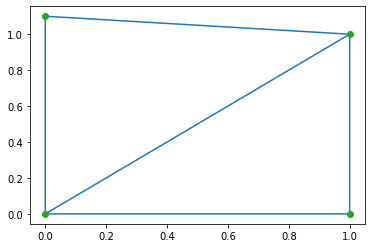

In [22]:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
tri = Delaunay(points)

import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

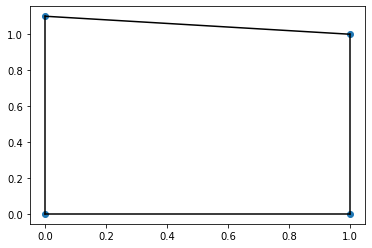

In [23]:
from scipy.spatial import ConvexHull
hull = ConvexHull(points)
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

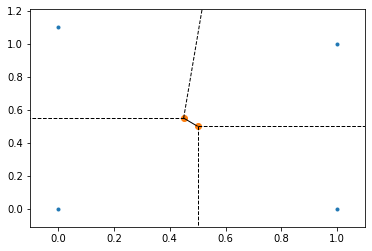

In [24]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()

In [25]:
from scipy.spatial import distance_matrix
distance_matrix([[0, 1]], [[1, 2]], p=2)
distance_matrix([[0, 1], [0, 1]], [[1, 2], [0, 1]], p=3)


array([[1.25992105, 0.        ],
       [1.25992105, 0.        ]])

In [27]:
points_1 = [(0, 0), (28, 13), (21, 24), (5, 17), (13, 8)]
points_2 = [(2, 17), (6, 6), (8, 25), (13, 28), (19, 15)]
distance_matrix(points_1, points_2, p=5)

array([[17.00007663,  6.89219013, 25.01675474, 28.119784  , 20.04414717],
       [26.00044815, 22.01433058, 20.30179359, 17.23047532,  9.00097525],
       [19.02572349, 19.25814812, 13.000007  ,  8.04938647,  9.00097525],
       [ 3.        , 11.00001366,  8.01183019, 11.41508815, 14.00016659],
       [11.7091133 ,  7.00266353, 17.00747657, 20.        ,  7.55313029]])

In [28]:
import numpy as np
from scipy.optimize import minimize

In [29]:
def function_to_minimize(x):
    return x[0]**3 + 4 * x[0]**2 + 10 + 30*x[1]**2

In [30]:
# Симплекс-метод
x0 = 0
res = minimize(function_to_minimize, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 10.000000
         Iterations: 81
         Function evaluations: 155


In [31]:
# BFGS
res = minimize(function_to_minimize, x0, method='bfgs', options={'xatol': 1e-8, 'disp': True})

         Current function value: -645910098997.280762
         Iterations: 2
         Function evaluations: 351
         Gradient evaluations: 113


C:\Users\askar\AppData\Local\Temp\ipykernel_12512\1312777196.py:2: OptimizeWarning: Unknown solver options: xatol
  res = minimize(function_to_minimize, x0, method='bfgs', options={'xatol': 1e-8, 'disp': True})


In [32]:
def linear(x):
    return x[0]
res = minimize(linear, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
res = minimize(linear, x0, method='bfgs', options={'xatol': 1e-8, 'disp': True})

Divide-by-zero encountered: rhok assumed large


C:\Users\askar\AppData\Local\Temp\ipykernel_12512\4014877376.py:4: OptimizeWarning: Unknown solver options: xatol
  res = minimize(linear, x0, method='bfgs', options={'xatol': 1e-8, 'disp': True})


Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zero encountered: rhok assumed large
Divide-by-zer

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\optimize.py:1210: RuntimeWarning: overflow encountered in multiply
  Hk = np.dot(A1, np.dot(Hk, A2)) + (rhok * sk[:, np.newaxis] *
c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\linesearch.py:287: RuntimeWarning: invalid value encountered in multiply
  return f(xk + alpha * pk, *args)


In [34]:
from scipy.optimize import Bounds
bounds = Bounds ([-10, 0], [10, 100.0])

In [33]:
import numpy as np
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint ([[1, 1]], [42], [42])

In [35]:
def func(x):
    return x[0]**3 - 5*x[1]**2 -5

In [36]:
x0 = np.array([0.5, 0])
res = minimize(func, x0, method='trust-constr', constraints=[linear_constraint],
        options={'verbose': 1}, bounds=bounds)

`gtol` termination condition is satisfied.
Number of iterations: 10, function evaluations: 27, CG iterations: 8, optimality: 9.44e-12, constraint violation: 0.00e+00, execution time: 0.062 s.


In [37]:
res = minimize(func, x0, method='SLSQP', constraints=[linear_constraint],
            bounds=bounds)

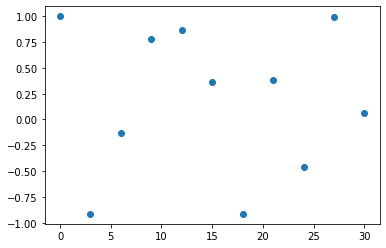

In [38]:
from scipy.interpolate import interp1d
x = np.linspace(0, 30, num=11, endpoint=True)
y = np.cos(-x**2)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')

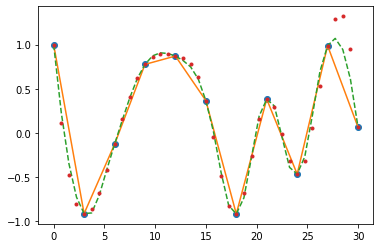

In [39]:
xnew = np.linspace(0, 30, num=41, endpoint=True)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='quadratic')
f3 = interp1d(x, y, kind='cubic')
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '.')
plt.show()